Analzia techniczna, inżynieria cech

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


STOCKS_FOLDER = "stocks"
MACROECOMOMIC_US_FOLDER = "macroeconomic_us"
MACROECOMOMIC_GLOBAL_FOLDER = "macroeconomic_global"
COMMODITY_FOLDER = "commodity"

In [55]:
data = pd.read_csv(f"{STOCKS_FOLDER}/AAPL.csv")
data = data.dropna()
data.drop(columns=["Dividends", "Stock Splits"], inplace=True)

In [56]:
# Ensure the Date column is in datetime format with utc=True
data["Date"] = pd.to_datetime(data["Date"], utc=True)

# Take from 2020 only
data = data[data["Date"].dt.year == 2020]


data.set_index("Date", inplace=True)

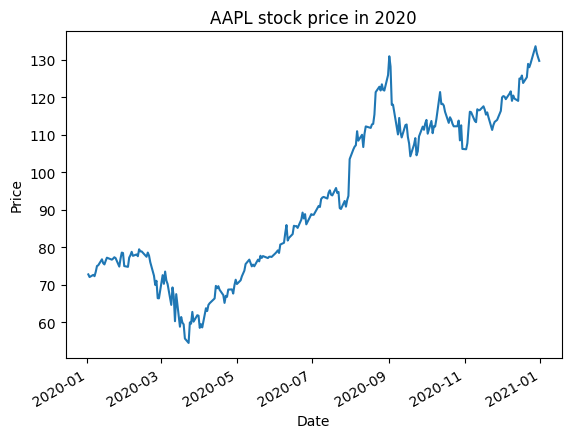

In [57]:
# Plot the data
data["Close"].plot()
plt.title("AAPL stock price in 2020")
plt.ylabel("Price")
plt.show()


In [58]:
from ta.trend import MACD, EMAIndicator, CCIIndicator, AroonIndicator, IchimokuIndicator, TRIXIndicator
from ta.volatility import BollingerBands, AverageTrueRange
from ta.momentum import RSIIndicator, StochasticOscillator, ROCIndicator, WilliamsRIndicator
from ta.volume import AccDistIndexIndicator

# Calculate EMA (Exponential Moving Average) for different periods
data['7sma'] = EMAIndicator(data['Close'], window=7).ema_indicator()
data['14sma'] = EMAIndicator(data['Close'], window=14).ema_indicator()
data['21sma'] = EMAIndicator(data['Close'], window=21).ema_indicator()

# Calculate MACD and Signal Line using ta library
data['7macd'] = MACD(data['Close'], window_slow=11, window_fast=3, window_sign=7).macd()
data['7macd_signal'] = MACD(data['Close'], window_slow=11, window_fast=3, window_sign=7).macd_signal()
data['14macd'] = MACD(data['Close'], window_slow=21, window_fast=7, window_sign=14).macd()
data['14macd_signal'] = MACD(data['Close'], window_slow=21, window_fast=7, window_sign=14).macd_signal()

# Calculate MACD Histogram for different periods
data['7macd_histogram'] = data['7macd'] - data['7macd_signal']
data['14macd_histogram'] = data['14macd'] - data['14macd_signal']

# Calculate RSI (Relative Strength Index) for different periods
data['7rsi'] = RSIIndicator(data['Close'], window=7).rsi()
data['14rsi'] = RSIIndicator(data['Close'], window=14).rsi()
data['21rsi'] = RSIIndicator(data['Close'], window=21).rsi()

# Calculate ATR (Average True Range) for different periods
data['7atr'] = AverageTrueRange(data['High'], data['Low'], data['Close'], window=7).average_true_range()
data['14atr'] = AverageTrueRange(data['High'], data['Low'], data['Close'], window=14).average_true_range()
data['21atr'] = AverageTrueRange(data['High'], data['Low'], data['Close'], window=21).average_true_range()

# Calculate Bollinger Bands for different periods
bollinger_7 = BollingerBands(data['Close'], window=7)
data['7upper'] = bollinger_7.bollinger_hband()
data['7middle'] = bollinger_7.bollinger_mavg()
data['7lower'] = bollinger_7.bollinger_lband()

bollinger_14 = BollingerBands(data['Close'], window=14)
data['14upper'] = bollinger_14.bollinger_hband()
data['14middle'] = bollinger_14.bollinger_mavg()
data['14lower'] = bollinger_14.bollinger_lband()

bollinger_21 = BollingerBands(data['Close'], window=21)
data['21upper'] = bollinger_21.bollinger_hband()
data['21middle'] = bollinger_21.bollinger_mavg()
data['21lower'] = bollinger_21.bollinger_lband()

# Calculate CCI (Commodity Channel Index) for different periods
data['7cci'] = CCIIndicator(data['High'], data['Low'], data['Close'], window=7).cci()
data['14cci'] = CCIIndicator(data['High'], data['Low'], data['Close'], window=14).cci()
data['21cci'] = CCIIndicator(data['High'], data['Low'], data['Close'], window=21).cci()

# Calculate Stochastic Oscillator for different periods
data['7stoch'] = StochasticOscillator(data['High'], data['Low'], data['Close'], window=7).stoch()

# Calculate Aroon Indicator for different periods
data['7aroon_up'] = AroonIndicator(data['High'], data['Low'], window=7).aroon_up()
data['7aroon_down'] = AroonIndicator(data['High'], data['Low'], window=7).aroon_down()
data['14aroon_up'] = AroonIndicator(data['High'], data['Low'], window=14).aroon_up()
data['14aroon_down'] = AroonIndicator(data['High'], data['Low'], window=14).aroon_down()

# Calculate Accumulation/Distribution (AD)
data['ad'] = AccDistIndexIndicator(data['High'], data['Low'], data['Close'], data['Volume']).acc_dist_index()

# Calculate Ichimoku Indicator (cloud components)
ichimoku = IchimokuIndicator(data['High'], data['Low'], window1=9, window2=26, window3=52)
data['ichimoku_a'] = ichimoku.ichimoku_a()  # Leading Span A
data['ichimoku_b'] = ichimoku.ichimoku_b()  # Leading Span B
data['ichimoku_base'] = ichimoku.ichimoku_base_line()  # Base Line
data['ichimoku_conversion'] = ichimoku.ichimoku_conversion_line()  # Conversion Line

# Calculate Rate of Change (ROC) for different periods
data['7roc'] = ROCIndicator(data['Close'], window=7).roc()
data['14roc'] = ROCIndicator(data['Close'], window=14).roc()

# Calculate Williams %R for different periods
data['7williams'] = WilliamsRIndicator(data['High'], data['Low'], data['Close'], lbp=7).williams_r()
data['14williams'] = WilliamsRIndicator(data['High'], data['Low'], data['Close'], lbp=14).williams_r()

# Calculate TRIX (Triple Exponential Average) for different periods
data['7trix'] = TRIXIndicator(data['Close'], window=7).trix()
data['14trix'] = TRIXIndicator(data['Close'], window=14).trix()

# Drop rows with NaN values (produced by indicators' calculations)
data.dropna(inplace=True)

# Display the first few rows of the dataframe
data.head()


,Open,High,Low,Close,Volume,7sma,14sma,21sma,7macd,7macd_signal,...,ichimoku_a,ichimoku_b,ichimoku_base,ichimoku_conversion,7roc,14roc,7williams,14williams,7trix,14trix
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-02 05:00:00+00:00,68.578763,73.233607,67.470930,72.594658,341397200,71.099806,73.071317,74.027598,-2.203833,-2.730992,...,70.734286,70.890387,70.890387,70.578186,-6.709292,-7.071986,-33.770261,-40.098767,-0.899756,-0.186849
2020-03-03 05:00:00+00:00,73.775359,73.855528,69.433911,70.289085,319475600,70.897126,72.700353,73.687733,-1.798039,-2.497754,...,70.734286,70.890387,70.890387,70.578186,-7.580270,-9.477171,-31.081451,-53.493354,-0.876140,-0.230778
2020-03-04 05:00:00+00:00,72.018860,73.709761,71.214710,73.549416,219178400,71.560198,72.813561,73.675159,-0.392345,-1.971402,...,70.479201,70.890387,70.890387,70.068016,1.529258,-7.475573,-2.645401,-33.614963,-0.755082,-0.257374
2020-03-05 05:00:00+00:00,71.795357,72.774429,70.796853,71.163704,187572800,71.461075,72.593580,73.446844,-0.569180,-1.620846,...,69.491018,70.890387,70.890387,68.091650,1.680133,-9.834697,-23.262533,-47.493085,-0.648636,-0.278209
2020-03-06 05:00:00+00:00,68.510749,70.653534,68.323683,70.218658,226176800,71.150471,72.276924,73.153373,-0.910446,-1.443246,...,69.480082,70.890387,70.890387,68.069778,-1.236939,-11.053964,-31.429541,-52.167352,-0.574925,-0.296625


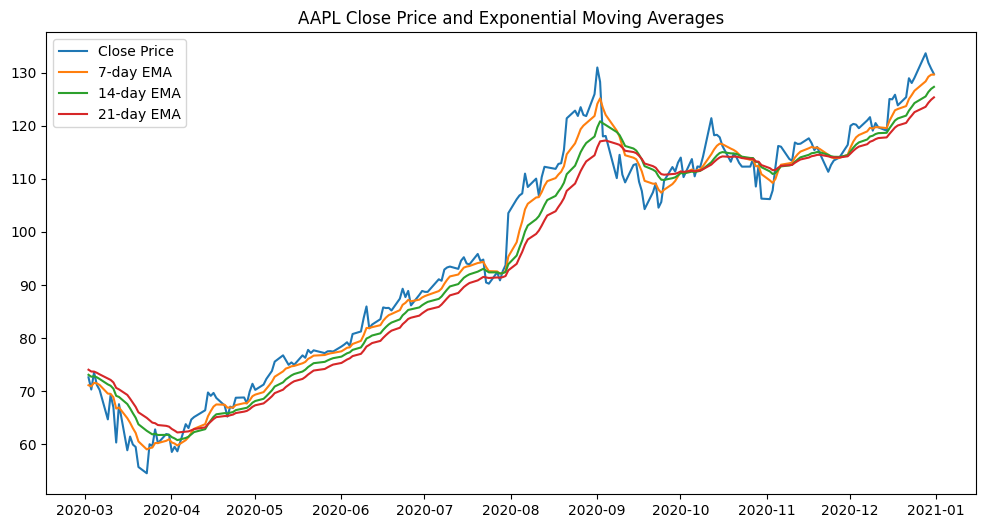

In [59]:
import matplotlib.pyplot as plt

#PLot close price anmd EMA
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['7sma'], label='7-day EMA')
plt.plot(data['14sma'], label='14-day EMA')
plt.plot(data['21sma'], label='21-day EMA')
plt.title('AAPL Close Price and Exponential Moving Averages')
plt.legend()
plt.show()

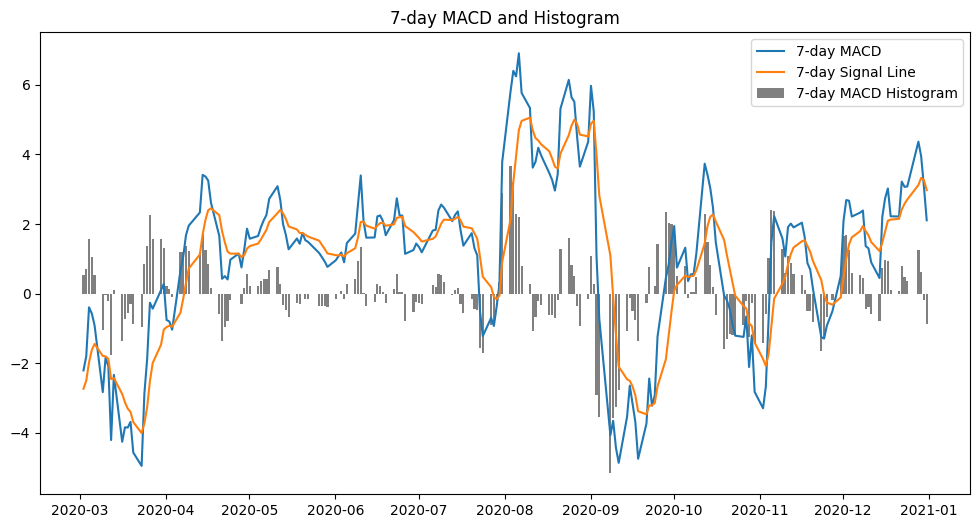

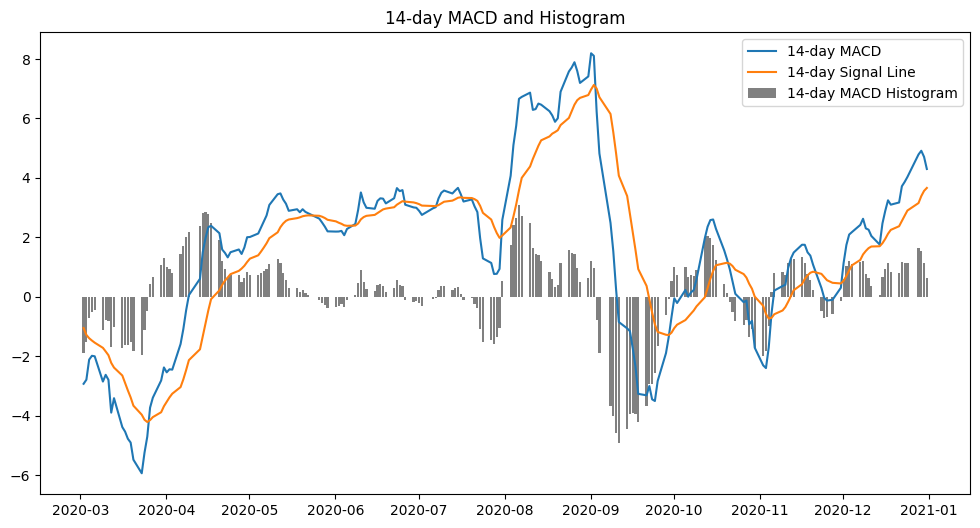

In [60]:
# Plot MACD and Histogram for 7-day period
plt.figure(figsize=(12, 6))
plt.plot(data['7macd'], label='7-day MACD')
plt.plot(data['7macd_signal'], label='7-day Signal Line')
plt.bar(data.index, data['7macd_histogram'], label='7-day MACD Histogram', color='gray')
plt.title('7-day MACD and Histogram')
plt.legend()
plt.show()

# Plot MACD and Histogram for 14-day period
plt.figure(figsize=(12, 6))
plt.plot(data['14macd'], label='14-day MACD')
plt.plot(data['14macd_signal'], label='14-day Signal Line')
plt.bar(data.index, data['14macd_histogram'], label='14-day MACD Histogram', color='gray')
plt.title('14-day MACD and Histogram')
plt.legend()
plt.show()






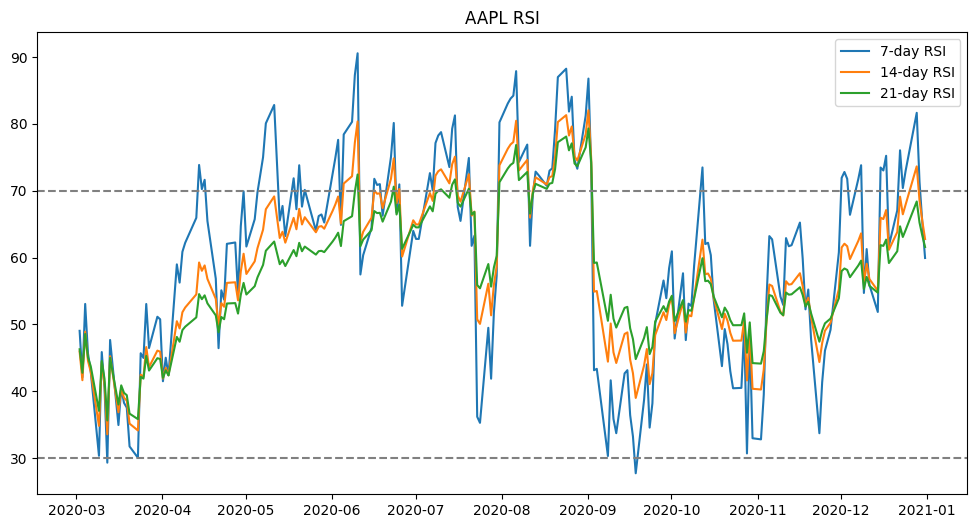

In [61]:
#plot RSI - Relative Strength Index

plt.figure(figsize=(12, 6))
plt.plot(data['7rsi'], label='7-day RSI')
plt.plot(data['14rsi'], label='14-day RSI')
plt.plot(data['21rsi'], label='21-day RSI')

# Add horizontal lines for overbought and oversold levels
plt.axhline(70, color='gray', linestyle='--')
plt.axhline(30, color='gray', linestyle='--')

plt.title('AAPL RSI')
plt.legend()
plt.show()


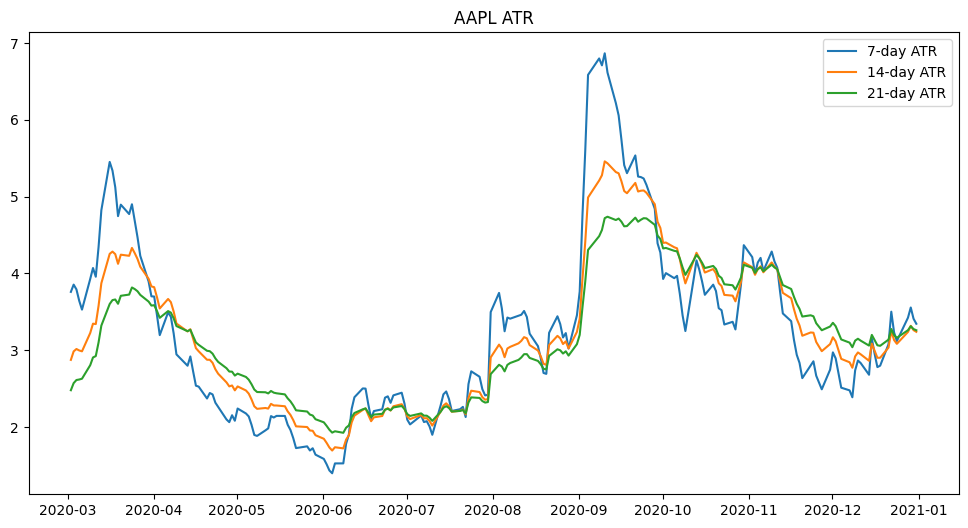

In [62]:
# plot atr

plt.figure(figsize=(12, 6))
plt.plot(data['7atr'], label='7-day ATR')
plt.plot(data['14atr'], label='14-day ATR')
plt.plot(data['21atr'], label='21-day ATR')
plt.title('AAPL ATR')
plt.legend()
plt.show()

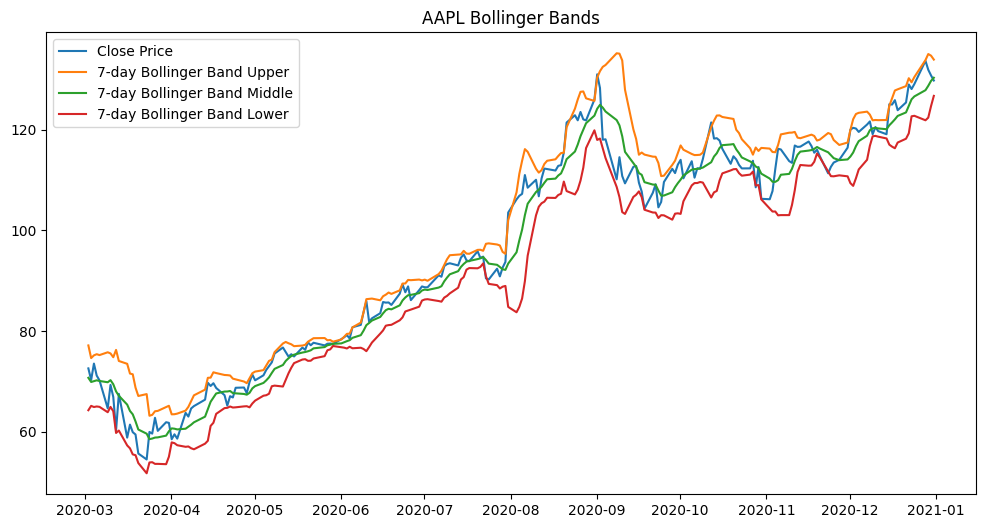

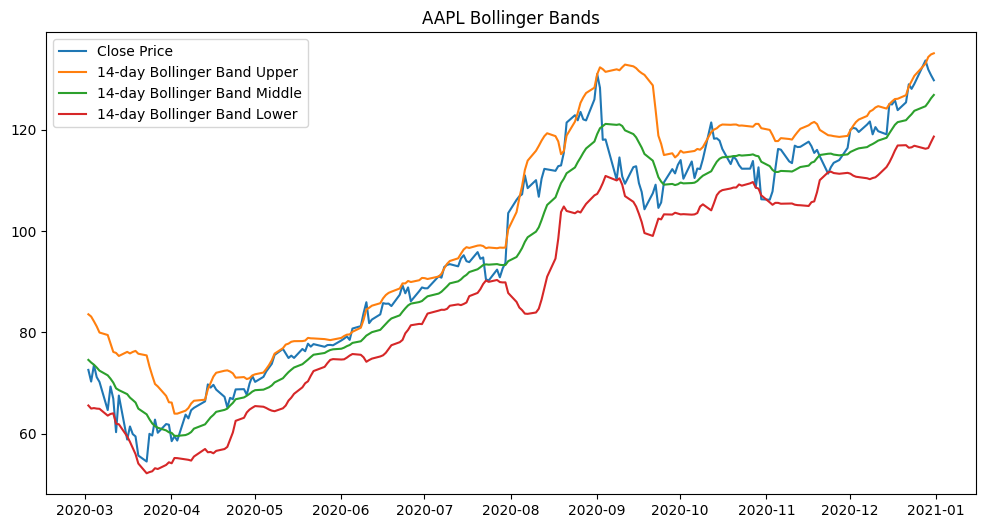

In [63]:
#plot boillinger bands

plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['7upper'], label='7-day Bollinger Band Upper')
plt.plot(data['7middle'], label='7-day Bollinger Band Middle')
plt.plot(data['7lower'], label='7-day Bollinger Band Lower')
plt.title('AAPL Bollinger Bands')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['14upper'], label='14-day Bollinger Band Upper')
plt.plot(data['14middle'], label='14-day Bollinger Band Middle')
plt.plot(data['14lower'], label='14-day Bollinger Band Lower')
plt.title('AAPL Bollinger Bands')
plt.legend()
plt.show()

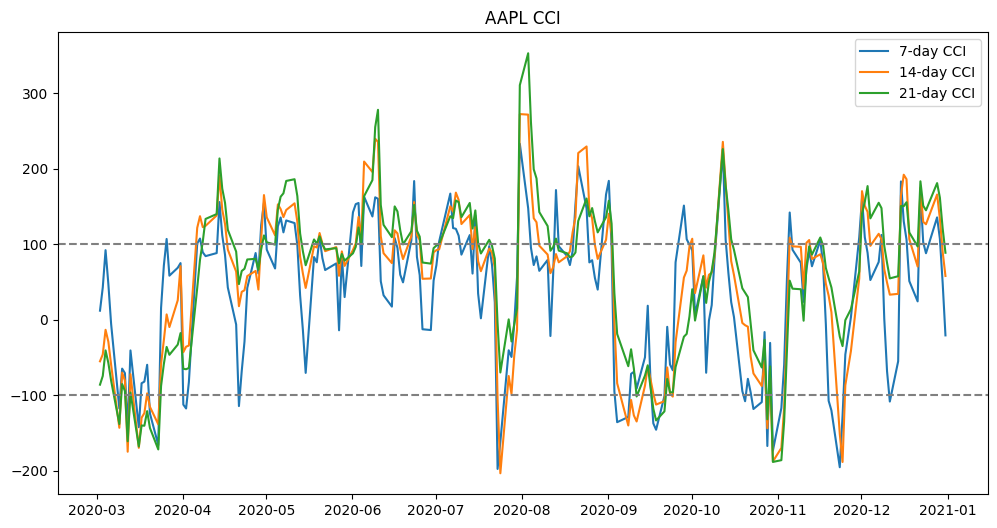

In [64]:
#plot cci

plt.figure(figsize=(12, 6))
plt.plot(data['7cci'], label='7-day CCI')
plt.plot(data['14cci'], label='14-day CCI')
plt.plot(data['21cci'], label='21-day CCI')

# Add horizontal lines for overbought and oversold levels
plt.axhline(100, color='gray', linestyle='--')
plt.axhline(-100, color='gray', linestyle='--')

plt.title('AAPL CCI')
plt.legend()
plt.show()

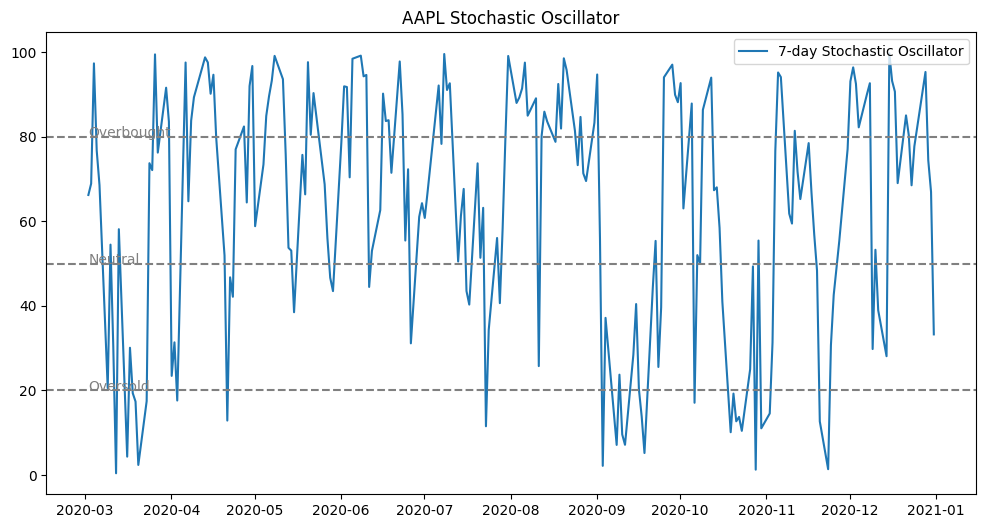

In [65]:
# Plot Stochastic Oscillator

plt.figure(figsize=(12, 6))
plt.plot(data['7stoch'], label='7-day Stochastic Oscillator')
plt.title('AAPL Stochastic Oscillator')

# Add horizontal lines for overbought and oversold levels
plt.axhline(80, color='gray', linestyle='--')
plt.axhline(20, color='gray', linestyle='--')

# add horizontal line for 50
plt.axhline(50, color='gray', linestyle='--')

# add labels to horizontal lines
plt.text(data.index[0], 80, 'Overbought', fontsize=10, color='gray')
plt.text(data.index[0], 20, 'Oversold', fontsize=10, color='gray')
plt.text(data.index[0], 50, 'Neutral', fontsize=10, color='gray')

plt.legend()
plt.show()

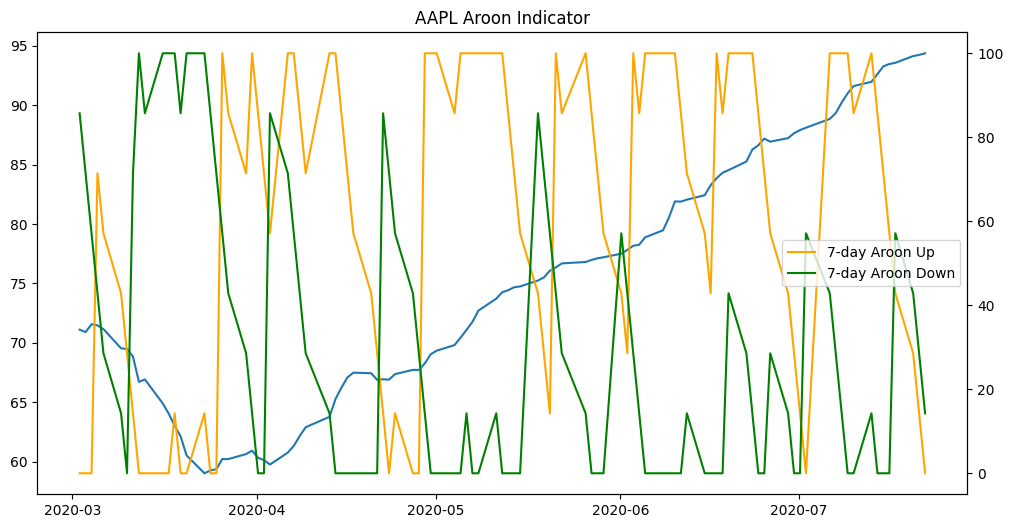

In [66]:
# Plot Aroon Indicator
# Explanation: Aroon Up and Aroon Down are used to identify the start of a new trend, the strength of the trend, and the end of a trend.

# overlay with close price on differernt scales

plt.figure(figsize=(12, 6))
plt.plot(data['7sma'][:100], label='Close Price')
plt.twinx()
plt.plot(data['7aroon_up'][:100], label='7-day Aroon Up', color='orange')
plt.plot(data['7aroon_down'][:100], label='7-day Aroon Down', color='green')
plt.title('AAPL Aroon Indicator')
plt.legend()
plt.show()

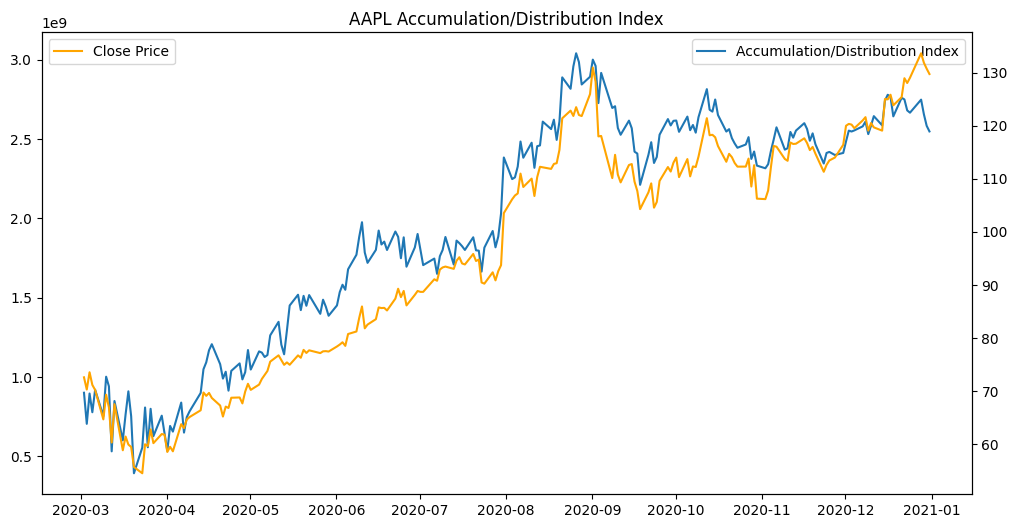

In [67]:
# Plot Accumulation/Distribution Index
plt.figure(figsize=(12, 6))
plt.plot(data['ad'], label='Accumulation/Distribution Index')
plt.legend()
plt.twinx()
plt.plot(data['Close'], label='Close Price', color='orange')
plt.title('AAPL Accumulation/Distribution Index')
plt.legend()
plt.show()

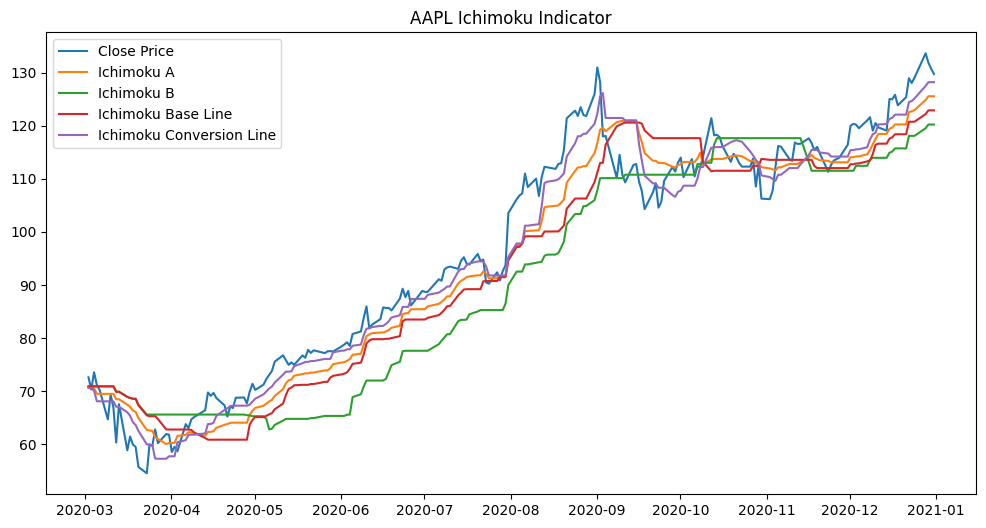

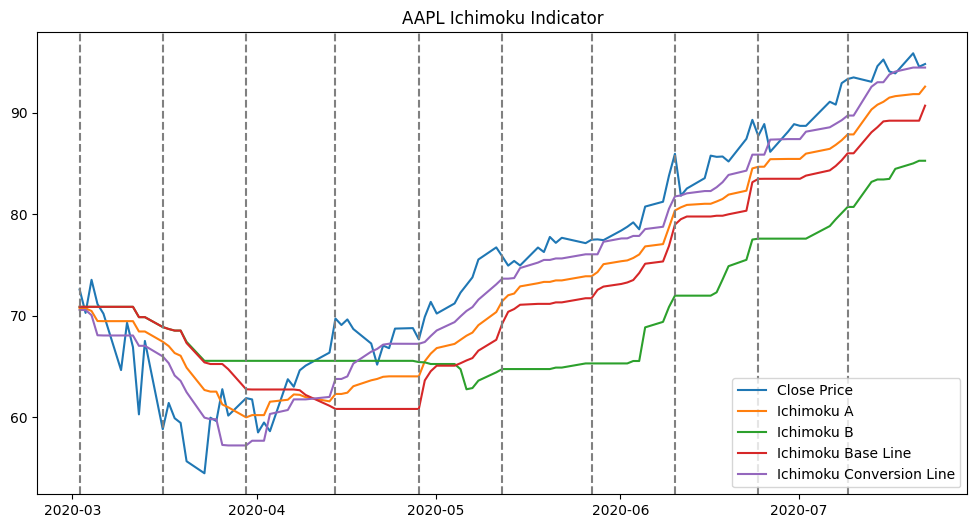

In [70]:
# Plot Ichimoku Indicator

plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['ichimoku_a'], label='Ichimoku A')
plt.plot(data['ichimoku_b'], label='Ichimoku B')
plt.plot(data['ichimoku_base'], label='Ichimoku Base Line')
plt.plot(data['ichimoku_conversion'], label='Ichimoku Conversion Line')
plt.title('AAPL Ichimoku Indicator')
plt.legend()
plt.show()


# cap to 100 ichimoku
plt.figure(figsize=(12, 6))
plt.plot(data['Close'][:100], label='Close Price')
plt.plot(data['ichimoku_a'][:100], label='Ichimoku A')
plt.plot(data['ichimoku_b'][:100], label='Ichimoku B')
plt.plot(data['ichimoku_base'][:100], label='Ichimoku Base Line')
plt.plot(data['ichimoku_conversion'][:100], label='Ichimoku Conversion Line')

# Add vertical lines
for i in range(0, 100, 10):
    plt.axvline(data.index[i], color='gray', linestyle='--')

plt.title('AAPL Ichimoku Indicator')
plt.legend()
plt.show()

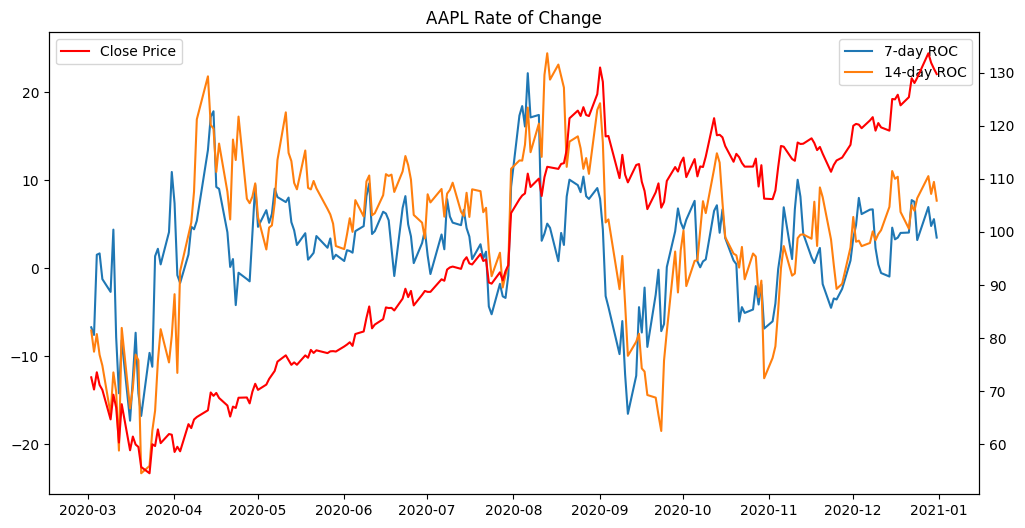

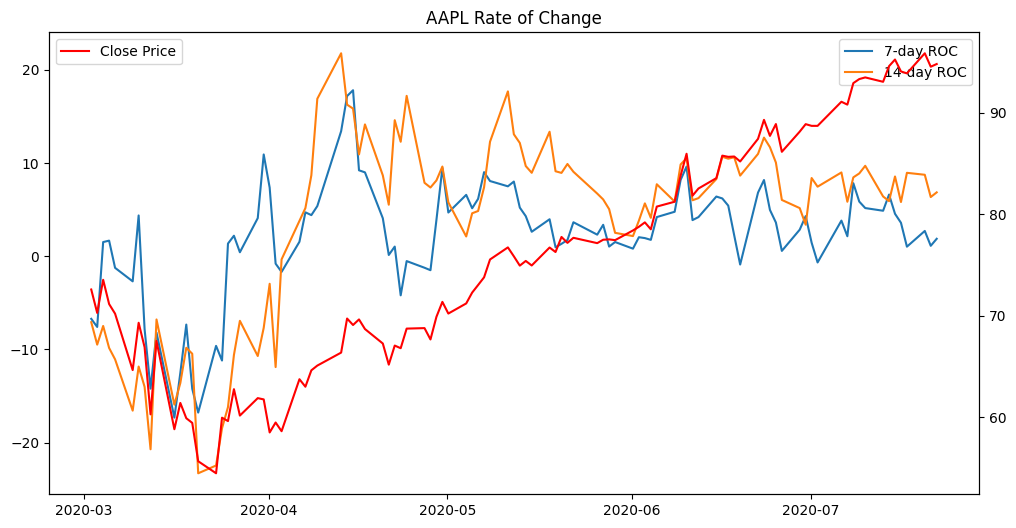

In [76]:
# Plot Rate of Change (ROC)

plt.figure(figsize=(12, 6))
plt.plot(data['7roc'], label='7-day ROC')
plt.plot(data['14roc'], label='14-day ROC')
plt.title('AAPL Rate of Change')
plt.legend()
plt.twinx()
plt.plot(data['Close'], label='Close Price', color='red')
plt.legend()
plt.show()

#cap to 100

plt.figure(figsize=(12, 6))
plt.plot(data['7roc'][:100], label='7-day ROC')
plt.plot(data['14roc'][:100], label='14-day ROC')
plt.title('AAPL Rate of Change')
plt.legend()
plt.twinx()
plt.plot(data['Close'][:100], label='Close Price', color='red')
plt.legend()
plt.show()


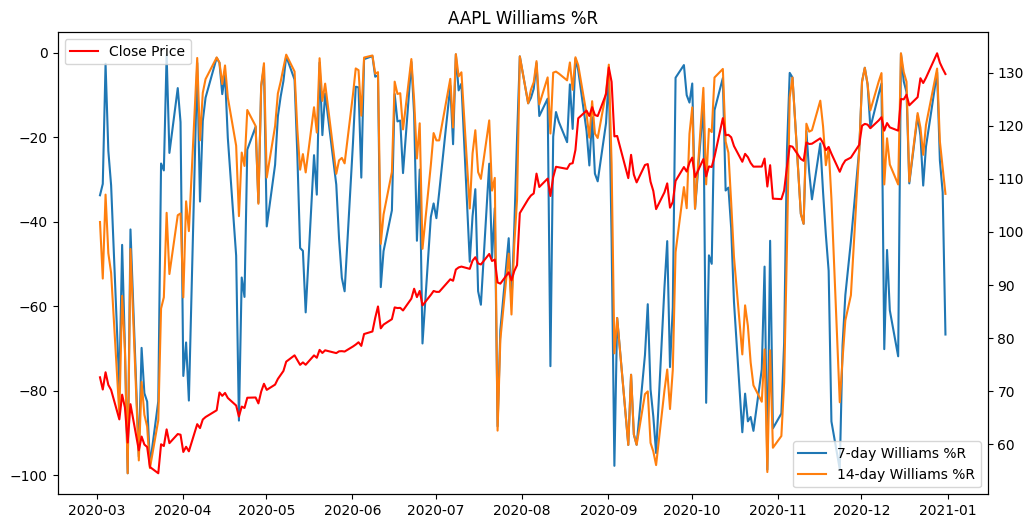

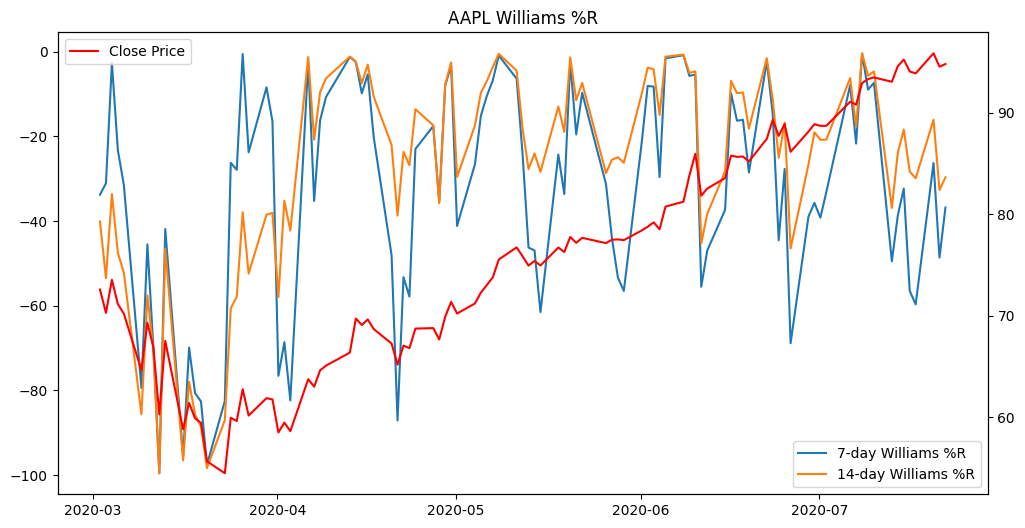

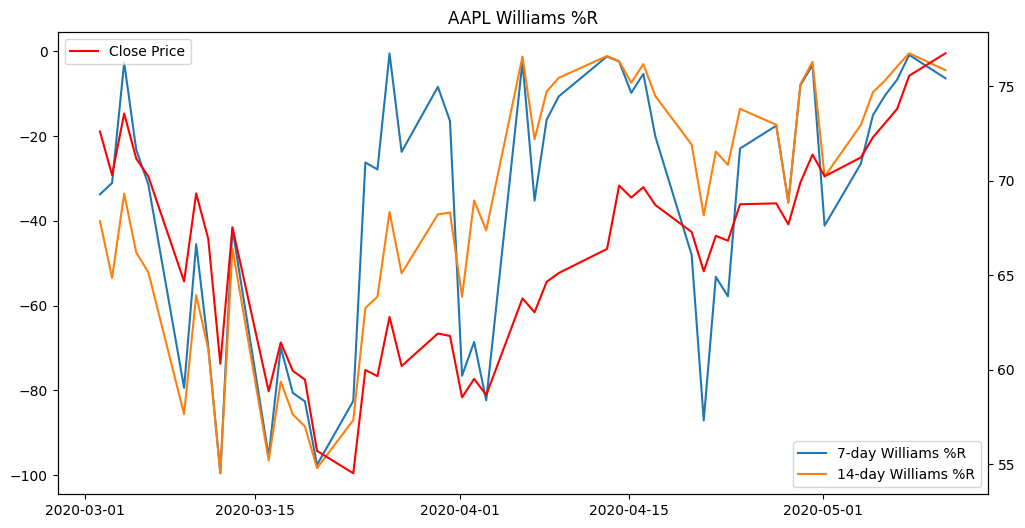

In [79]:
# Plot Williams %R

plt.figure(figsize=(12, 6))
plt.plot(data['7williams'], label='7-day Williams %R')
plt.plot(data['14williams'], label='14-day Williams %R')
plt.title('AAPL Williams %R')
plt.legend()
plt.twinx()
plt.plot(data['Close'], label='Close Price', color='red')
plt.legend()
plt.show()

#cap to 100

plt.figure(figsize=(12, 6))
plt.plot(data['7williams'][:100], label='7-day Williams %R')
plt.plot(data['14williams'][:100], label='14-day Williams %R')
plt.title('AAPL Williams %R')
plt.legend()
plt.twinx()
plt.plot(data['Close'][:100], label='Close Price', color='red')
plt.legend()
plt.show()

# cap to 50

plt.figure(figsize=(12, 6))
plt.plot(data['7williams'][:50], label='7-day Williams %R')
plt.plot(data['14williams'][:50], label='14-day Williams %R')
plt.title('AAPL Williams %R')
plt.legend()
plt.twinx()
plt.plot(data['Close'][:50], label='Close Price', color='red')
plt.legend()
plt.show()

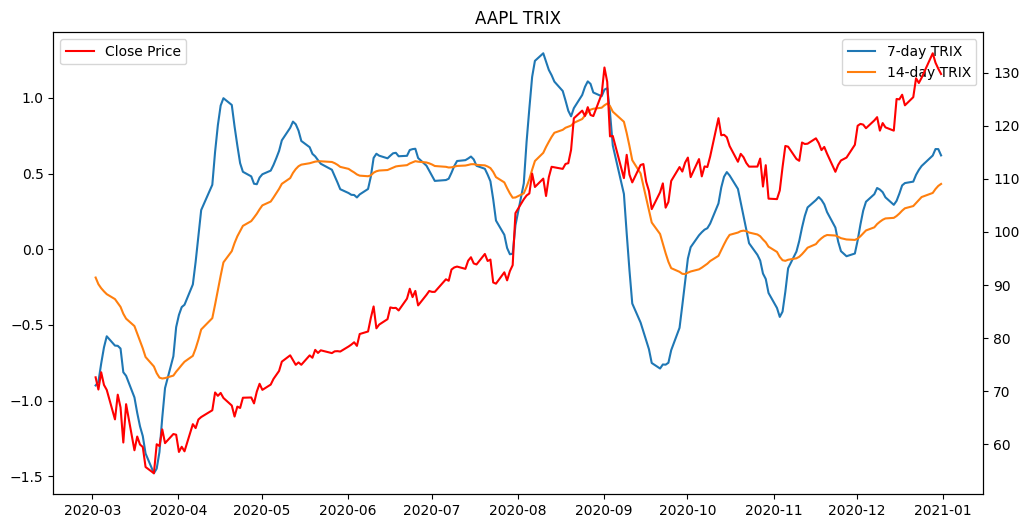

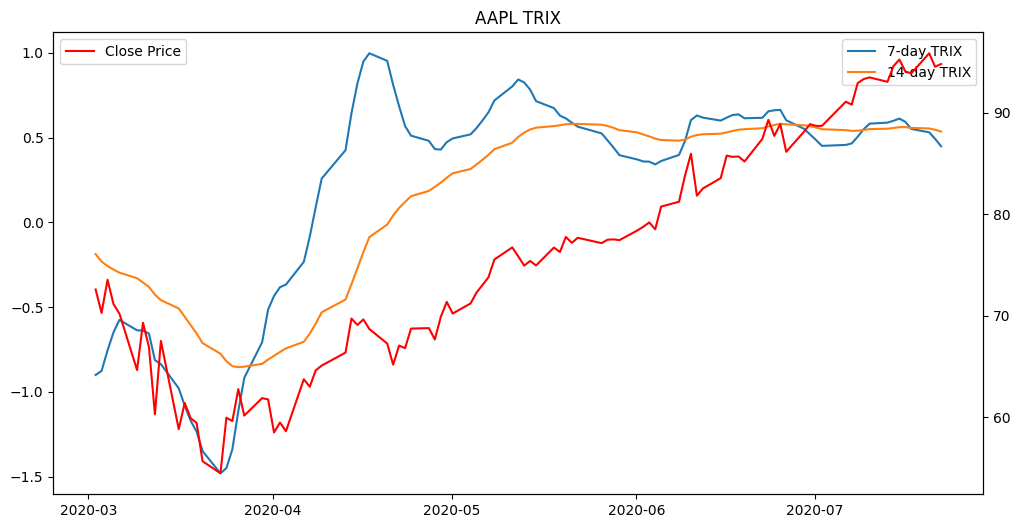

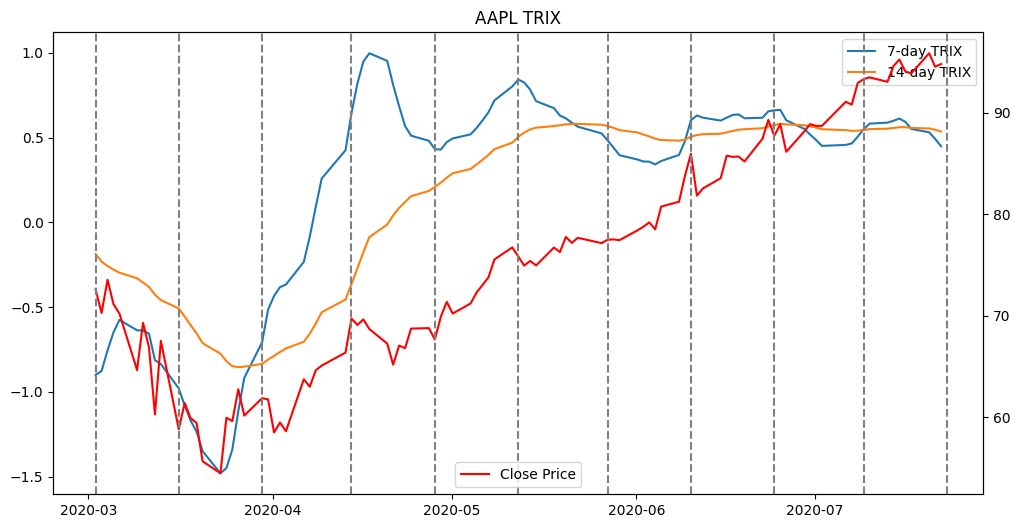

In [85]:
# Plot TRIX

plt.figure(figsize=(12, 6))
plt.plot(data['7trix'], label='7-day TRIX')
plt.plot(data['14trix'], label='14-day TRIX')
plt.title('AAPL TRIX')
plt.legend()
plt.twinx()
plt.plot(data['Close'], label='Close Price', color='red')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(data['7trix'][:100], label='7-day TRIX')
plt.plot(data['14trix'][:100], label='14-day TRIX')
plt.title('AAPL TRIX')
plt.legend()
plt.twinx()
plt.plot(data['Close'][:100], label='Close Price', color='red')
plt.legend()
plt.show()

# draw vertical lines and horizontal lines
plt.figure(figsize=(12, 6))
plt.plot(data['7trix'][:100], label='7-day TRIX')
plt.plot(data['14trix'][:100], label='14-day TRIX')
plt.title('AAPL TRIX')
plt.legend()
plt.twinx()
plt.plot(data['Close'][:100], label='Close Price', color='red')
plt.legend()
for i in range(0, 101, 10):
    plt.axvline(data.index[i], color='gray', linestyle='--')

plt.show()



In [91]:
%pip install mplfinance

Note: you may need to restart the kernel to use updated packages.


In [111]:
import plotly.graph_objects as go

# Create a candlestick chart using Plotly
fig = go.Figure(data=[go.Candlestick(
    x=data.index,
    open=data['Open'],
    high=data['High'],
    low=data['Low'],
    close=data['Close'],
    name="Candlestick Chart",
    increasing_line_color='green',  # Green for increasing prices
    decreasing_line_color='red',  # Red for decreasing prices
    increasing_fillcolor='rgba(0, 255, 0, 0.2)',  # Light green fill for increasing
    decreasing_fillcolor='rgba(255, 0, 0, 0.2)',  # Light red fill for decreasing
    line=dict(width=1),  # Increase the width of the candlestick borders (line thickness)
    whiskerwidth=1,
    #make wicks higher
    increasing_line_width=2,
    decreasing_line_width=2

)])

# Add 7-period and 14-period EMA indicators as overlays with custom styles
fig.add_trace(go.Scatter(
    x=data.index, 
    y=data['7sma'], 
    mode='lines', 
    name='7-period EMA', 
    line=dict(color='blue', width=2)
))

# Add the actual price (close) as an overlay line
fig.add_trace(go.Scatter(
    x=data.index, 
    y=data['Close'], 
    mode='lines', 
    name='Actual Close Price', 
    line=dict(color='yellow', width=2, dash='dash')
))

# Customize the layout to make it more attractive
fig.update_layout(
    title="Candlestick Chart with 7 & 14 Period EMAs and Actual Price",
    xaxis_title="Date",
    yaxis_title="Price",
    xaxis_rangeslider_visible=False,  # Remove range slider to make the chart cleaner
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent background
    template='plotly_dark',  # Dark theme
    title_x=0.5,  # Center the title
    title_font=dict(size=24, color='white', family='Arial'),
    xaxis=dict(showgrid=False, showline=False, zeroline=False),
    yaxis=dict(showgrid=False, showline=False, zeroline=False),
    margin=dict(t=50, b=30, l=30, r=30),  # Adjust margins
    height=1300  # Increase the overall height of the plot (adjust the value as needed
)

# Show plot
fig.show()
